In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Chargement du dataset
# Note : Si ton fichier s'appelle 'auto-mpg.data', adapte le nom ici.
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

# On lit le fichier en remplaçant les '?' par NaN et en ignorant la colonne car_name
df = pd.read_csv(url,names=columns, delim_whitespace=True, na_values='?')
df = df.drop('car_name', axis=1)

# Suppression des 6 lignes avec des valeurs manquantes (horsepower)
df = df.dropna()

print(f"Taille du dataset après nettoyage : {df.shape}")
print(df.head())

Taille du dataset après nettoyage : (392, 8)
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model_year  origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1  


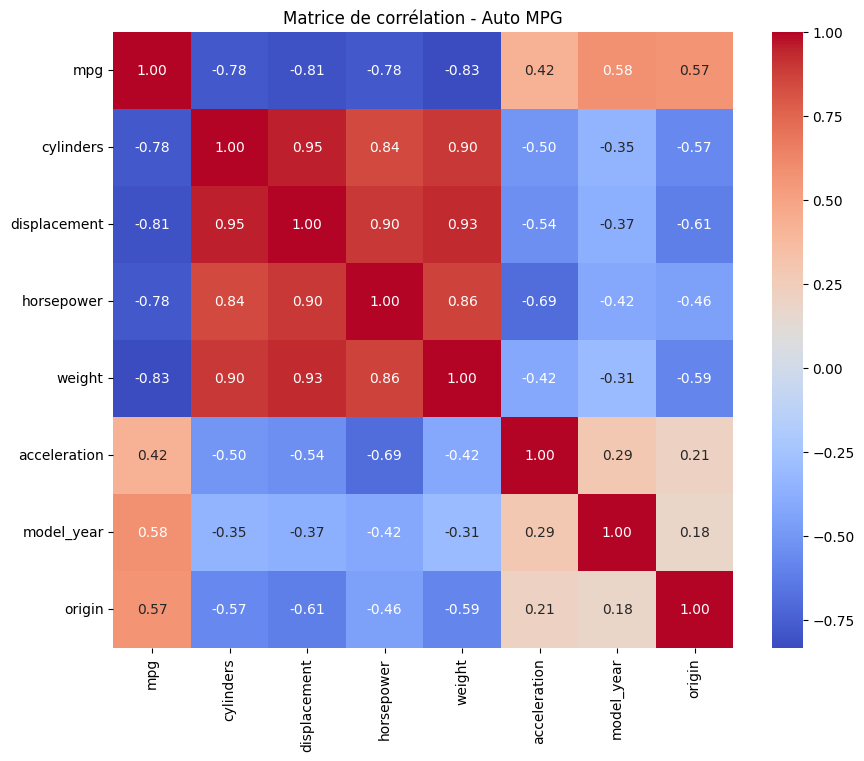

In [5]:
# Affichage de la corrélation entre les variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation - Auto MPG")
plt.show()

In [6]:
# Séparation X (caractéristiques) et y (cible)
X = df.drop('mpg', axis=1)
y = df['mpg']

# Découpage Train/Test (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Données prêtes et normalisées.")

Données prêtes et normalisées.


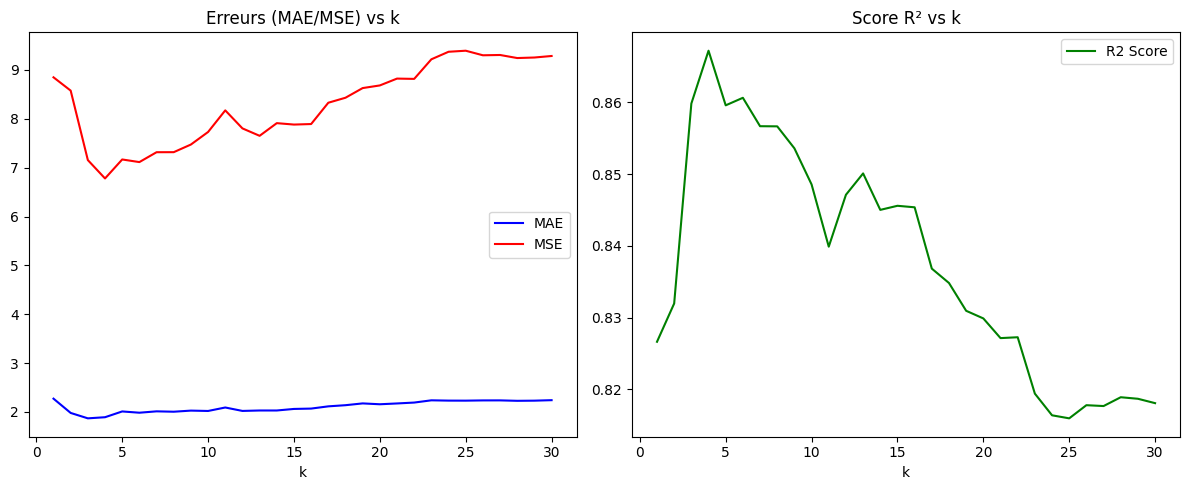

In [7]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

k_values = range(1, 31)
mae_list = []
mse_list = []
r2_list = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    
    mae_list.append(mean_absolute_error(y_test, y_pred))
    mse_list.append(mean_squared_error(y_test, y_pred))
    r2_list.append(r2_score(y_test, y_pred))

# Visualisation des résultats
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, mae_list, label='MAE', color='blue')
plt.plot(k_values, mse_list, label='MSE', color='red')
plt.title('Erreurs (MAE/MSE) vs k')
plt.xlabel('k')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(k_values, r2_list, label='R2 Score', color='green')
plt.title('Score R² vs k')
plt.xlabel('k')
plt.legend()

plt.tight_layout()
plt.show()

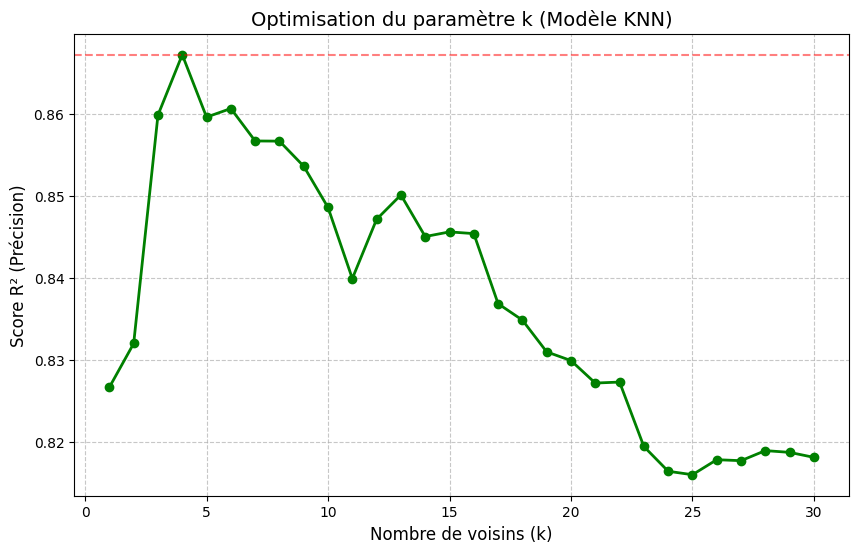

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, r2_list, 'g-o', linewidth=2, markersize=6)
plt.axhline(y=max(r2_list), color='r', linestyle='--', alpha=0.5)
plt.title('Optimisation du paramètre k (Modèle KNN)', fontsize=14)
plt.xlabel('Nombre de voisins (k)', fontsize=12)
plt.ylabel('Score R² (Précision)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# On définit le dictionnaire des modèles
reg_models = {
    "KNN (k=5)": KNeighborsRegressor(n_neighbors=5),
    "Régression Linéaire": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results_comparison = []

for name, model in reg_models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results_comparison.append({"Modèle": name, "MAE": round(mae, 3), "MSE": round(mse, 3), "R2": round(r2, 4)})

# Affichage du tableau final
df_comp = pd.DataFrame(results_comparison)
print(df_comp)

                Modèle    MAE     MSE      R2
0            KNN (k=5)  2.009   7.167  0.8596
1  Régression Linéaire  2.420  10.711  0.7902
2        Random Forest  1.711   5.634  0.8896


In [10]:
import joblib
# On sauvegarde le meilleur (ici supposé être Random Forest)
joblib.dump(reg_models["Random Forest"], 'auto-mpg.pkl')
print("Le modèle de régression est sauvegardé sous 'auto-mpg.pkl'")

Le modèle de régression est sauvegardé sous 'auto-mpg.pkl'
